In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plot

In [2]:
dataset=pd.read_csv('insurance.csvv')
print(dataset.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
# missing values decrease the accuracy rate of our model so check them out
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# A coefficient of correlation is a value between -1 and +1 that denotes both the strength and 
# directionality of a relationship between two variables. 
cofficients_of_correlation=dataset.corr()
print(cofficients_of_correlation)


               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


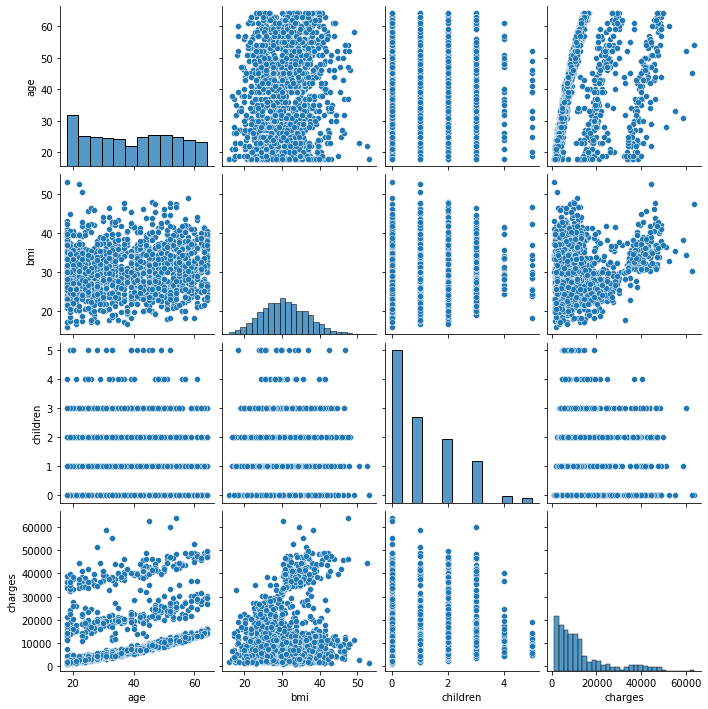

In [5]:
#A pairwise plot shows the relationship between pairs of variables. 
# The plot shows a scatterplot of each pair of variables, allowing you to see the 
# nuances(a very slight difference) of the distribution that simply looking at 
# the correlation may not actually indicate. 
sb.pairplot(dataset)
plot.show()


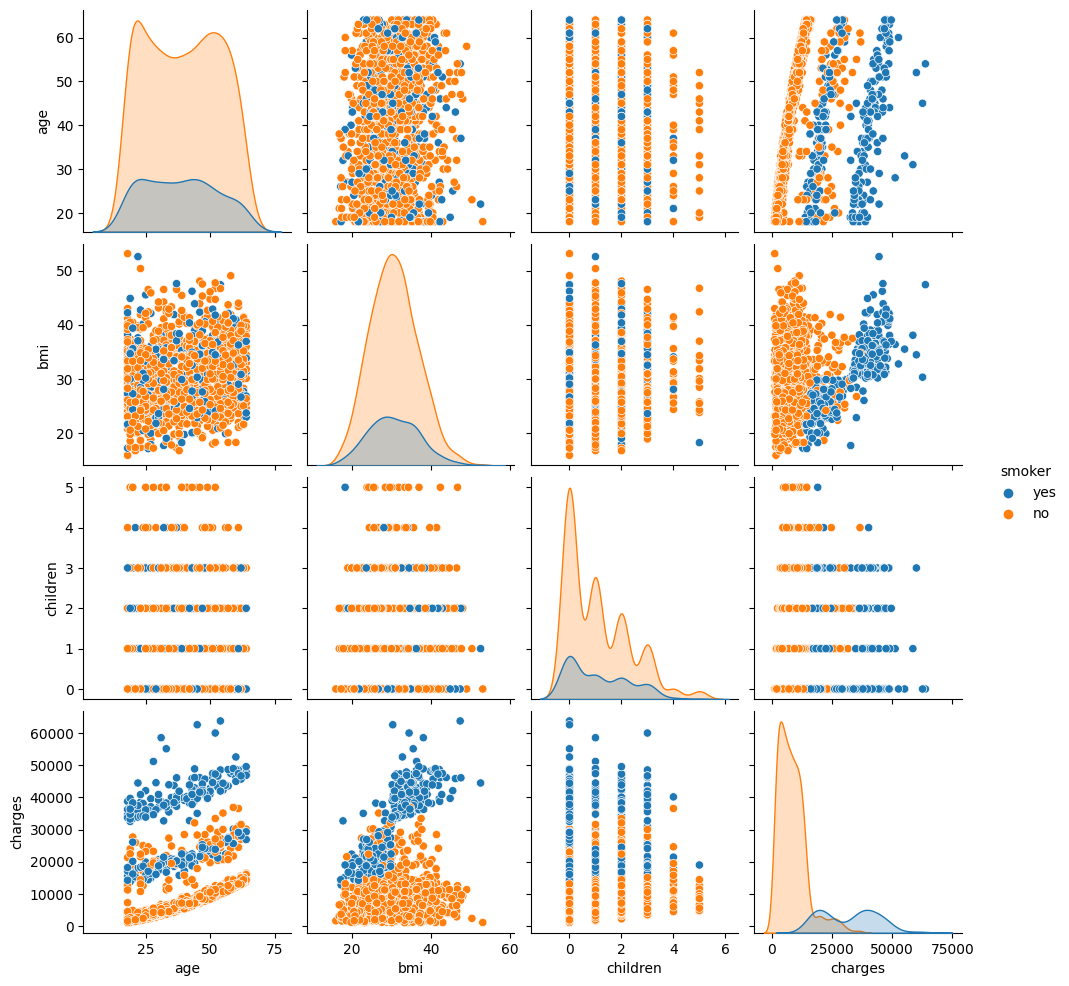

In [6]:
# smoker variable is a binary variable (either “yes” or “no”), let’s split the data by 
# that variable. This can be done by passing in the hue= parameter.
sb.pairplot(dataset, hue='smoker')
plot.show()


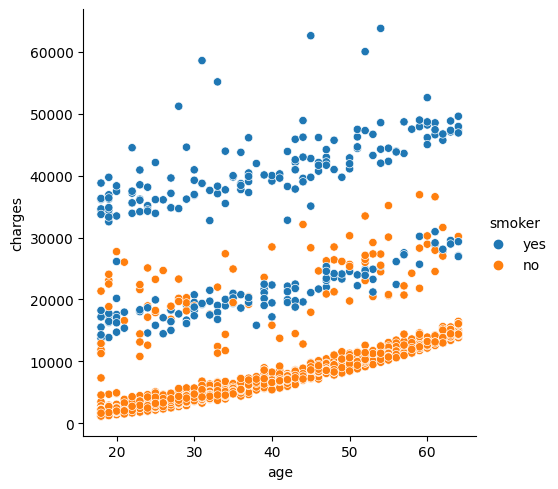

In [7]:
#Let’s take a closer look at the relationship between the age and charges variables
# Plotting a scatterplot of the relationship of age and charges
sb.relplot(data=dataset, x='age', y='charges', hue='smoker')
plot.show()

In [8]:
#Aside from a few outliers, there’s a clear, linear-looking, trend between 
# the age and charges for non-smokers(correlation between age and charges was the strongest) 
# Smoking is a strong determinant in charges, let’s filter the DataFrame 
# to only non-smokers and see if this makes a difference in correlation.
non_smokers=dataset[dataset['smoker']=='no']
non_smokers.corr()

,age,bmi,children,charges
age,1.000000,0.122638,0.033395,0.627947
bmi,0.122638,1.000000,0.019208,0.084037
children,0.033395,0.019208,1.000000,0.138929
charges,0.627947,0.084037,0.138929,1.000000


In [9]:
# Instantiating a LinearRegression Model
from sklearn.linear_model import LinearRegression

model= LinearRegression()
#this object has many methods

In [10]:
x = non_smokers[['age']] #dataframe
y = non_smokers['charges']  #series

In [11]:
## Splitting the datasets into training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, train_size=0.3) 
#train_size (float or int) represent the proportion of the dataset to include in the train split. 

In [12]:
model.fit(x_train, y_train)
#sklearn fit method uses the training data as an input to train the machine learning model.

LinearRegression()

In [13]:
#we can use our testing data to see how accurate the data is using Root mean squared error and R squared
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(x_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(r2)
print(rmse)


0.3832446299645599
4707.578357959136
